* Interés en partidos políticos y participación
* Rango etario con mayor participación y su interés en partidos políticos
* Participación a nivel nacional

In [1]:
#importando las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#cargamos los datos a nuestro DataFrame 
df_datos = pd.read_csv('./../Datos/VW_VOTARON_2020PLEB_Datos completos.csv',delimiter=';')

# Los votantes tenían interés en partidos políticos?

In [3]:
#Creamos nuestro Dataframe identificar cuantos fueron los votantes respecto del padrón agrupado por partido político
df_participacion_pp = df_datos.groupby('Partido').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_pp['participacion'] = np.round(df_participacion_pp['Votaron']*100/df_participacion_pp['Cedula'],2)

In [4]:
#Ahora creamos la agrupación para identificar el interes en partidos políticos
#creamos nuestras condiciones de agrupación
condiciones = [
    (df_participacion_pp['Partido']  == 'SIN PARTIDO'),
    (df_participacion_pp['Partido']  != 'SIN PARTIDO')
]
#creamos nuestras opciones para cada condición de agrupación
opciones = ['no','si']
#incluímos las condiciones con sus opciones respectivas a nuestra nueva columna
df_participacion_pp['interes partido'] = np.select(condiciones ,opciones)

In [5]:
#ahora en un nuevo Dataframe agrupamos la cantidad total del padrón electoral y sus votantes agrupados por su interes en partidos políticos
df_count_interes_partido = df_participacion_pp.groupby(['interes partido']).sum()[['Cedula','Votaron']].reset_index()

In [6]:
#mostramos nuestra agrupación en formato de tabla
df_count_interes_partido

,interes partido,Cedula,Votaron
0,no,13965452,6970350
1,si,890267,571709


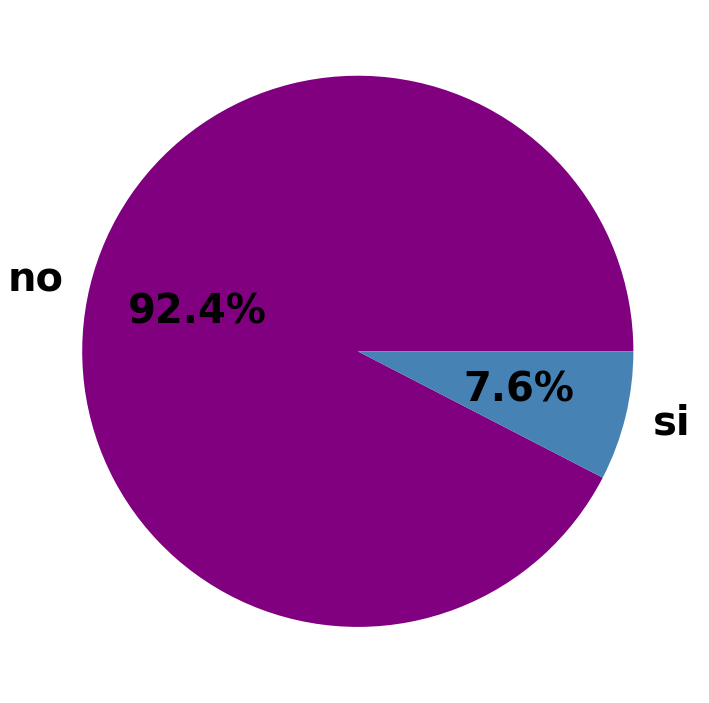

In [8]:
#mostramos el porcentaje de votantes que tenían interes en algun partido político al momento de la votación
plt.pie(df_count_interes_partido['Votaron'],
       labels=df_count_interes_partido['interes partido'],
       autopct='%1.1f%%',
       colors=['purple','steelblue'],
       textprops=dict(weight='bold',size=40))
#plt.title('Interes por partidos políticos en las votaciones',size=40)

plt.rcParams["figure.figsize"] = (10, 10)  

plt.savefig('count_interes_partido.png')
plt.tight_layout() 
#plt.legend()
plt.show()

# Cuales fueron los 10 partidos políticos con mayor participación en la votación?

In [9]:
#Cuales fueron los partidos con mayor participación? Cuál fue la participación de sus adherentes?
#utilizamos nuestro Dataframe anteriormente creado y nos quedamos con los 10 partidos más votados creando un nuevo dataframe
df_mayor_pp = df_participacion_pp.query("Partido != 'SIN PARTIDO'").sort_values('participacion',ascending=False).head(10)

In [10]:
# Mostramos los partidos con mayor participación en la votación
df_mayor_pp[['Partido','Cedula','Votaron']]

,Partido,Cedula,Votaron
24,[174] PARTIDO ALTERNATIVA FEMINISTA,107,106
21,[171] PARTIDO LIBERTARIO DE CHILE (EN FORMACION),106,97
17,[160] POR LA REPRESENTACION CIUDADANA,118,107
19,[168] FUERZA CULTURAL (EN FORMACION),121,107
14,[150] REPUBLICANO DE CHILE,16280,13459
30,[45] REVOLUCION DEMOCRATICA,36757,29764
13,[149] CONVERGENCIA SOCIAL,3868,2881
23,[173] UNIDOS EN LA FE,141,104
15,[152] FUERZA NACIONAL (EN FORMACION),98,70
33,[6] COMUNISTA DE CHILE,83424,57508


In [11]:
#ordernamos nuestro dataframe para luego gráficar nuestro resultado
df_mayor_pp= df_mayor_pp.sort_values('participacion',ascending=True)

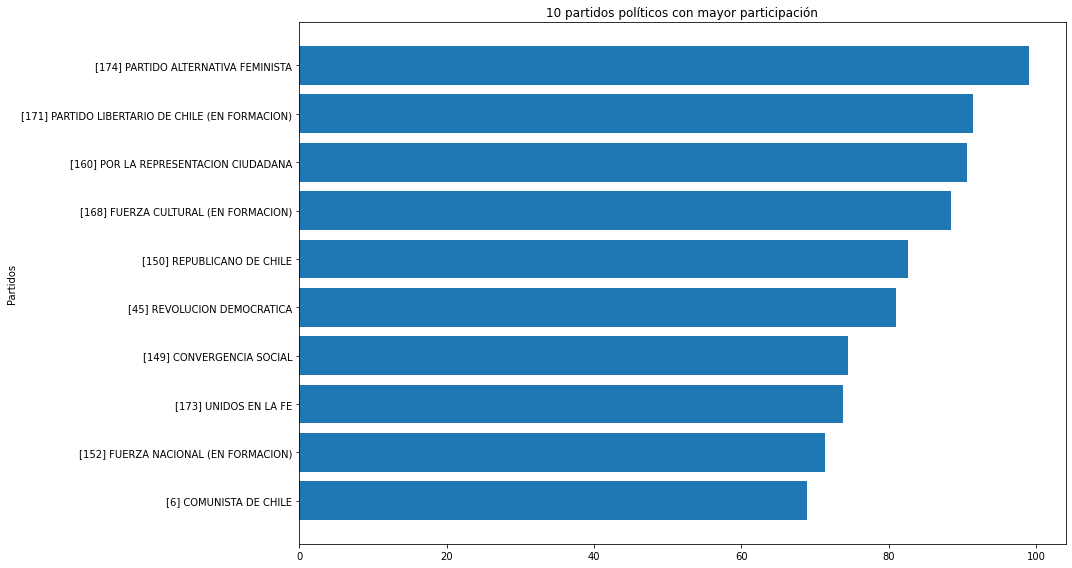

In [13]:
# Graficamos nuestro dataframe con la participación en la votación por partido político


labels = df_mayor_pp['Partido'].reset_index()


#Obtenemos la posicion de cada etiqueta en el eje de X
y = np.arange(len(labels))
#tamaño de cada barra
width = 0.2

fig, ax = plt.subplots(figsize=(15, 8))

#Generamos las barras para cada categoría
rects1 = ax.barh(df_mayor_pp['Partido'],df_mayor_pp['participacion'])



#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Partidos')
ax.set_title('10 partidos políticos con mayor participación')
ax.set_yticks(y)
ax.set_yticklabels(labels['Partido'])
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
#ax.legend()

#Añadimos las etiquetas para cada barra
#autolabel(rects1)
fig.tight_layout()
plt.savefig('test.png')
#Mostramos la grafica con el metodo show()


plt.show()

# Cual fue la posición política con mayor participación?

In [17]:
#creando dataframe para padrón electoral por partido
df_padron_partido = df_datos.groupby('Partido').count()[['Cedula','Votaron']].reset_index()

In [18]:
#detalle de partidos con su posición política
df_pp = pd.read_csv('./../Datos/pp.csv')

In [19]:
#añadimos la posición política para cada partido
df_padron_partido = df_padron_partido.merge(df_pp, how = 'left', left_on='Partido', right_on='Partido').fillna(0)

In [20]:
#creando dataframe para participación por posición política
df_participacion_pp = df_padron_partido.groupby('posicion').sum()[['Cedula','Votaron']].reset_index()

In [21]:
# incorporamos el % de participación
df_participacion_pp['participacion'] = np.round(df_participacion_pp['Votaron']*100/df_participacion_pp['Cedula'],2)

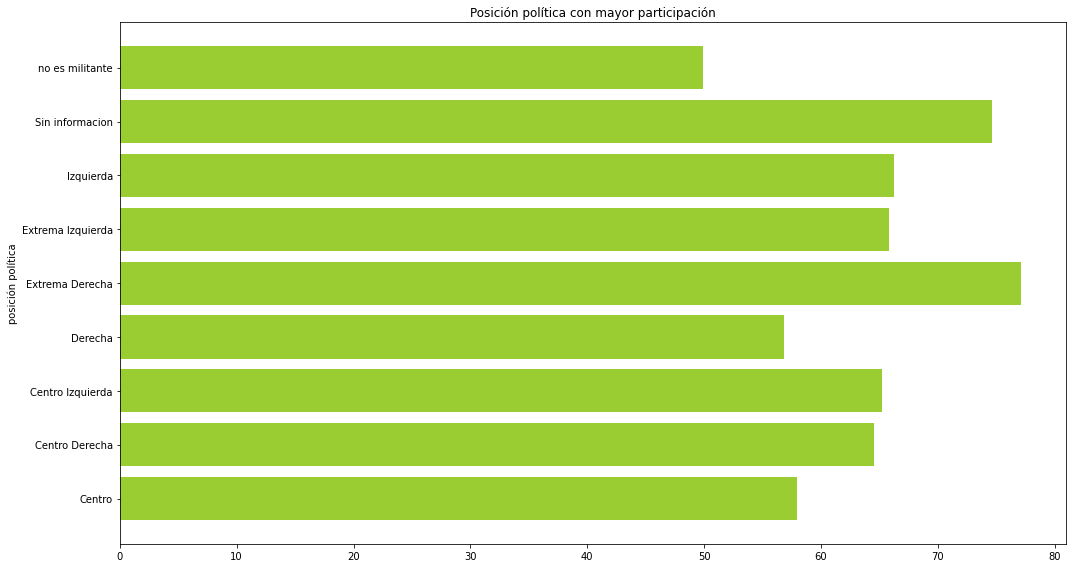

In [22]:
# Gráficamos la participación en la votación por posición política
labels = df_participacion_pp['posicion'].reset_index()


#Obtenemos la posicion de cada etiqueta en el eje de X
y = np.arange(len(labels))
#tamaño de cada barra
width = 0.2

fig, ax = plt.subplots(figsize=(15, 8))

#Generamos las barras para cada categoría
rects1 = ax.barh(df_participacion_pp['posicion'],df_participacion_pp['participacion'],color='yellowgreen')



#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('posición política')
ax.set_title('Posición política con mayor participación')
ax.set_yticks(y)
ax.set_yticklabels(labels['posicion'])
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
#ax.legend()

#Añadimos las etiquetas para cada barra
#autolabel(rects1)
fig.tight_layout()
plt.savefig('test.png')
#Mostramos la grafica con el metodo show()


plt.show()

# Como se compone el padrón electoral por rango etario?

In [23]:
#creando dataframe para padrón electoral por rango de edad
df_padron_rango_edad = df_datos.groupby('Rango Edad').count()[['Cedula','Votaron']].reset_index()

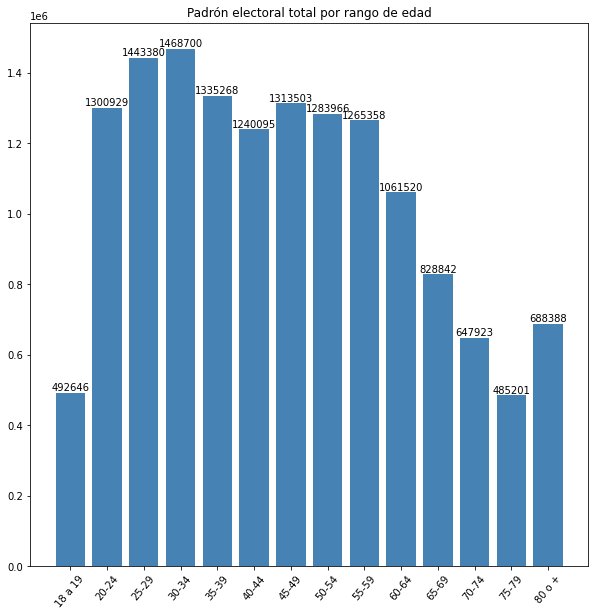

In [24]:
#mostramos el padrón electoral por randgo de edad
plt.bar(df_padron_rango_edad['Rango Edad'],df_padron_rango_edad['Cedula'],
       color='steelblue')

#añadimos el título para nuestra gráfica
plt.title('Padrón electoral total por rango de edad')
#incorporamos una rotación para las etiquetas en eje x
plt.xticks(rotation=50)

#incorporamos anotaciones para nuestras barras         
for i,txt in enumerate(df_padron_rango_edad['Cedula']):
    plt.annotate(txt,(df_padron_rango_edad['Rango Edad'][i],df_padron_rango_edad['Cedula'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom')            

plt.rcParams["figure.figsize"] = (20, 6)  
plt.savefig('padron_electoral_edad.png')
plt.show()

In [25]:
#agregamos el % de participación como columna a nuestro dataframe
df_padron_rango_edad['participacion'] = np.round(df_padron_rango_edad['Votaron']*100/df_padron_rango_edad['Cedula'],2)

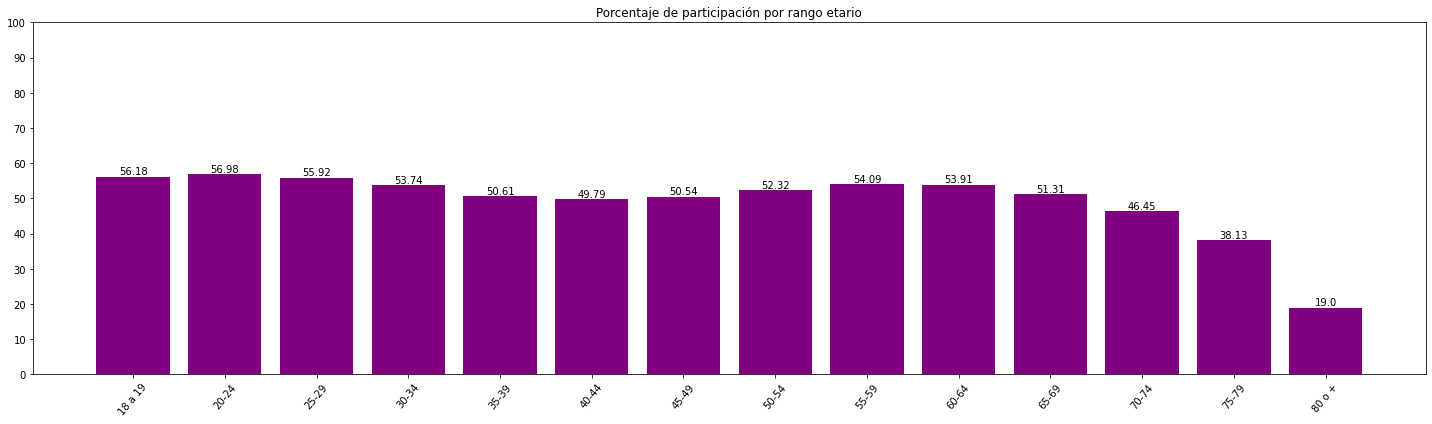

In [27]:
#mostramos el porcentaje de participación por rango etario
plt.bar(df_padron_rango_edad['Rango Edad'],df_padron_rango_edad['participacion'],
         color='purple')

plt.rcParams["figure.figsize"] = (20, 6)  



plt.xticks(rotation=50)    

plt.title('Porcentaje de participación por rango etario')
plt.yticks(np.arange(0,110,10))


for i,txt in enumerate(df_padron_rango_edad['participacion']):
    plt.annotate(txt,(df_padron_rango_edad['Rango Edad'][i],df_padron_rango_edad['participacion'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom') 

plt.savefig('porc_participacion_edad.png')
plt.tight_layout() 
plt.show()

* los mayores porcentajes de participación se agrupan en dos grandes conjuntos: jovenes entre los 18 a 29 años y mayores entre los 50 y 64 años. cual es la proporción de votantes que sienten afinidad con los partidos políticos? 

In [28]:
# Creamos dataframe inicial para obtener la participación de ambos rangos etarios
df_edades_af_p = df_datos.groupby(['Rango Edad','Edad','Partido']).count()[['Cedula','Votaron']].reset_index()

In [29]:
#creamos condiciones para exluir los rangos etarios que excluiremos del ánalisis
cond1 = df_edades_af_p['Edad'] < 64
cond2 = df_edades_af_p['Edad'] >= 50
cond3 = df_edades_af_p['Edad'] < 30

In [30]:
#Creamos dataframes por separado para cada grupo de rango etario en base a las condiciones creadas
df_menores = df_edades_af_p[cond3]
df_mayores = df_edades_af_p[cond2 & cond1]

In [34]:
#Unimos ambos dataframes con los dos grupos seleccionados y su preferencia política
frames = [df_menores,df_mayores]
df_edades_af_p = pd.concat(frames)

In [35]:
#Creamos un nuevo dataframe para agrupar por rango etario y preferencia politica y así
# identificar los rangos etarios con mayor interés en partidos políticos al momento de la votación
df_edades_af_p = df_edades_af_p.groupby(['Rango Edad','Partido']).sum()[['Cedula','Votaron']].reset_index()

In [36]:
#condiciones para cada agrupacion por interes en partidos polítios
condiciones = [
    (df_edades_af_p['Partido']  == 'SIN PARTIDO'),
    (df_edades_af_p['Partido']  != 'SIN PARTIDO')
]

#creamos las opciones de agrupación para cada condición
opciones = ['no','si']

#incluir condiciones y opciones
df_edades_af_p['interes partido'] = np.select(condiciones ,opciones)

In [37]:
#Modificamos nuestro dataframe agrupando po rango etario y su interés en partidos politicos
df_edades_af_p = df_edades_af_p.groupby(['Rango Edad','interes partido']).sum()[['Cedula','Votaron']].reset_index()

In [38]:
#Realizamos el conteo de los votantes con interés en partidos políticos
conteo_si = df_edades_af_p[df_edades_af_p['interes partido']=='si']

In [39]:
#Realizamos el conteo de los votantes sin interés en partidos políticos
conteo_no = df_edades_af_p[df_edades_af_p['interes partido']=='no']

In [40]:
#Mostramos en formato tabla nuestro resultado
df_edades_af_p

,Rango Edad,interes partido,Cedula,Votaron
0,18 a 19,no,489354,274514
1,18 a 19,si,3292,2276
2,20-24,no,1228294,693248
3,20-24,si,72635,48036
4,25-29,no,1362507,754471
5,25-29,si,80873,52696
6,50-54,no,1186222,607764
7,50-54,si,97744,64026
8,55-59,no,1164217,616464
9,55-59,si,101141,67955


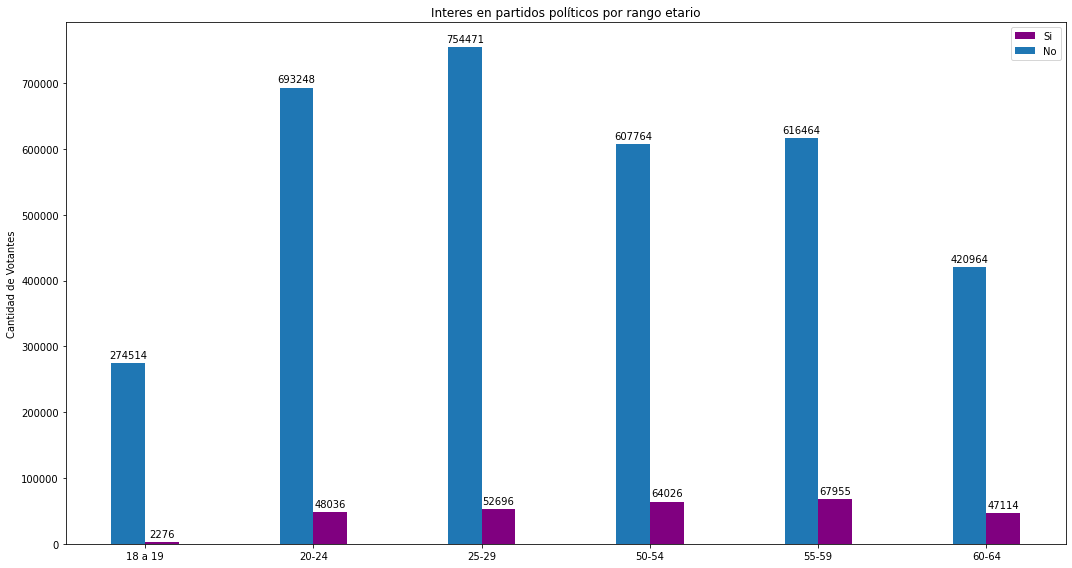

In [41]:
#Gráficamos nuestro Dataframe

#Agrupamos nuestras etiquetas para eje x en una variable
labels = conteo_si['Rango Edad'].reset_index()


#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(labels))
#tamaño de cada barra
width = 0.2

#Damos el tamaño de nuestra gráfica
fig, ax = plt.subplots(figsize=(15, 8))

#Generamos las barras para cada categoría
rects1 = ax.bar(x + width/2,conteo_si['Votaron'],width,label='Si',color='purple')

rects2 = ax.bar(x - width/2,conteo_no['Votaron'],width,label='No')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Cantidad de Votantes')
ax.set_title('Interes en partidos políticos por rango etario')
ax.set_xticks(x)
ax.set_xticklabels(labels['Rango Edad'])
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

#mediante la siguiente función generaremos anotaciones para cada barra 
def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()


plt.show()

# Desde la perspectiva a nivel nacional ,cuales fueron las Regiones con mayor participación?

In [42]:
#Creamos nuestro dataframe agrupando el padrón y las votaciones por cada Región.
df_participacion_reg = df_datos.groupby('Region').count()[['Cedula','Votaron']].reset_index()
#Añadimos el % de participación por cada Región
df_participacion_reg['participacion'] = np.round(df_participacion_reg['Votaron']*100/df_participacion_reg['Cedula'],2)

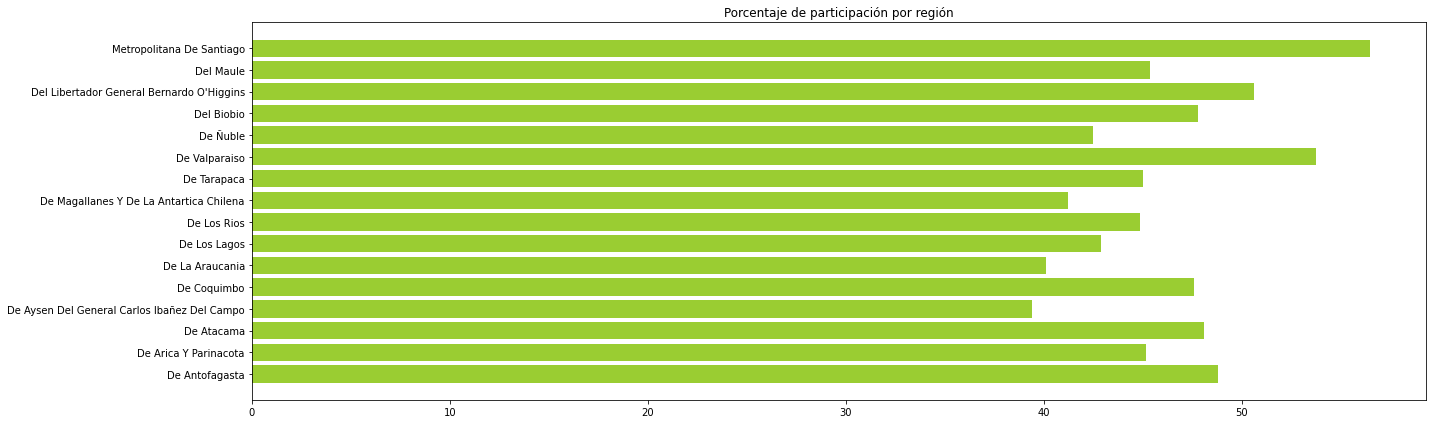

In [43]:
#mostramos el porcentaje de participación por región
plt.barh(df_participacion_reg['Region'],df_participacion_reg['participacion'],
         color='yellowgreen')

#modificamos el tamaño de la figura
plt.rcParams["figure.figsize"] = (15, 6)  



#plt.yticks(rotation=50)    

plt.title('Porcentaje de participación por región')
#plt.xticks(np.arange(0,110,10))
plt.savefig('porc_partic_region.png')
plt.tight_layout() 
plt.show()

In [44]:
#cuales fueron las 3 regiones con mayor participación?
df_participacion_reg[['Region','Cedula','participacion']].sort_values('participacion',ascending=False).head(3)

,Region,Cedula,participacion
15,Metropolitana De Santiago,5839397,56.47
10,De Valparaiso,1585206,53.78
13,Del Libertador General Bernardo O'Higgins,763106,50.60


In [45]:
#cuales fueron las 3 regiones con menor participación?
df_participacion_reg[['Region','Cedula','participacion']].sort_values('Cedula',ascending=True).head(3)

,Region,Cedula,participacion
3,De Aysen Del General Carlos Ibañez Del Campo,97438,39.41
8,De Magallanes Y De La Antartica Chilena,159618,41.25
1,De Arica Y Parinacota,191498,45.15


Dentro de las regiones con participación mas alta las 3 primeras pertencen a la parte mas centríca del país,
¿como se distribuyo la participación por comuna en cada una de estas regiones? 

* Región Metropolitana:

In [46]:
#cargando datos geojson para la Región metropolitana
map_data_rm = gpd.read_file('./../Datos/RM_all.geojson')

In [47]:
#creando data frame de región metropolitana
df_rm = df_datos[df_datos['Region'] == 'Metropolitana De Santiago']

In [48]:
#normalizando algunos nombres de comunas
comunas_to_replace = ['Maria Pinto', 'San Joaquin', 'San Ramon', 'Isla De Maipo',
                     'San Jose De Maipo', 'Alhue', 'Curacavi', 'Calera De Tango',
                     'Conchali', 'Peñalolen', 'Maipu', 'Estacion Central']
comunas_new_value = ['María Pinto', 'San Joaquín', 'San Ramón', 'Isla de Maipo',
                    'San José de Maipo', 'Alhué', 'Curacaví', 'Calera de Tango',
                     'Conchalí', 'Peñalolén', 'Maipú', 'Estación Central']

df_rm = df_rm.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [58]:
#creamos un nuevo dataframe para identificar la participación por comuna en la región metropolitana
rm_comuna_count = df_rm.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()

In [59]:
rm_comuna_part = map_data_rm.merge(rm_comuna_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
#agregamos el % de participación como columna a nuestro dataframe
rm_comuna_part['participacion'] = np.round(rm_comuna_part['Votaron']*100/rm_comuna_part['Cedula'],2)

Cuales fueron las 5 Comunas con mayor participación?

In [60]:
#Comunas de la región con mayor participación
rm_comuna_part[['Comuna','participacion']].sort_values('participacion',ascending=False).head(5)

,Comuna,participacion
4,Lo Barnechea,67.77
34,Vitacura,67.76
45,La Reina,64.12
49,Ñuñoa,63.99
41,Huechuraba,62.43


[]

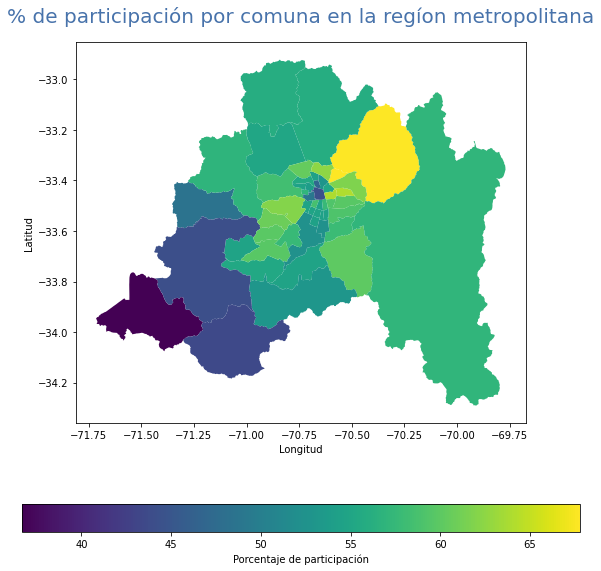

In [61]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('% de participación por comuna en la regíon metropolitana', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
# ax.axis([-12, 5, 32, 48])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
rm_comuna_part.plot(column='participacion',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.savefig('map_partic_rm.png')
plt.plot()

Dentro de las regiones con participación mas baja las 3 primeras pertencen a la parte mas extrema del país
como se distribuyo la participación por comuna en cada una de estas regiones? 

In [62]:
#creando data frame de región de Aysén
df_ays = df_datos[df_datos['Region'] == "De Aysen Del General Carlos Ibañez Del Campo"]

In [63]:
#cargando datos geojson para la Región de Aysén
map_data_ays = gpd.read_file('./../Datos/AYS_all.geojson')

In [64]:
#normalizando algunos nombres de comunas
comunas_to_replace = ['Rio Ibañez', 'Aysen']
comunas_new_value = ['Río Ibáñez', 'Aysén']

df_ays = df_ays.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [65]:
#creamos un nuevo dataframe para identificar la participación por comuna en la región dee aysén
ays_comuna_count = df_ays.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()

In [66]:
ays_comuna_part = map_data_ays.merge(ays_comuna_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
#agregamos el % de participación como columna a nuestro dataframe
ays_comuna_part['participacion'] = np.round(ays_comuna_count['Votaron']*100/ays_comuna_count['Cedula'],2)

In [67]:
#Comunas de la región de aysén con mayor participación
ays_comuna_part[['Comuna','participacion']].query("Comuna != 0").sort_values('participacion',ascending=False).head(5)

,Comuna,participacion
4,Tortel,41.69
0,O'Higgins,40.00
2,Chile Chico,38.76
5,Cochrane,38.08
9,Cisnes,37.91


[]

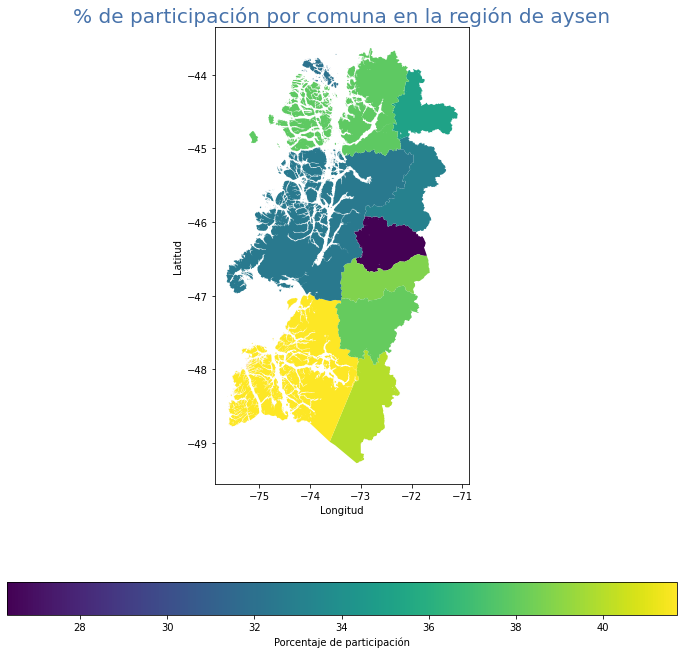

In [68]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(12, 12))
 
# Control del título y los ejes
ax.set_title('% de participación por comuna en la región de aysen', 
             pad =5, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
#ax.axis([-120, -70, 30, 20])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
ays_comuna_part.plot(column='participacion',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.savefig('map_partic_aysen.png')
plt.plot()